# 만들어진 데이터로 일단 이것 저것 해보기

- soynlp, wordcloud, gensim 모듈을 설치해야함
```
pip install soynlp        # 데이터를 토큰화 할 때
pip install wordcloud     # 워드클라우드를 만들때
pip install gensim        # word2vec 사용할 때
```

### 국민청원 데이터 분석 자료에 다 있음
- 토큰화
- 최빈단어 확인
- 워드클라우드
- 벡터화
- 단어 유사도 확인
- 이진분류는 제외함

<br/><br/>
### 1. 데이터 로드

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/naver_clova.csv', encoding='utf-8')

In [4]:
df.head()

,Unnamed: 0,title,publish_datetime,text,url
0,0,애기들이 좋아하는 ai스피커 네이버클로바,2019-03-20 23:01:00,애기들이 좋아하는 ai스피커 네이버클로바\n작년부터 tv에 #인공지능 스피커가 \n...,https://blog.naver.com/sky121400?Redirect=Log&...
1,1,네이버 클로바 스피커 1년 사용 후기,2019-03-31 19:35:00,네이버 클로바 스피커 1년 사용 후기\n네이버 클로바 1년 사용 후기를 몇 자 적어...,https://blog.naver.com/danjuck?Redirect=Log&lo...
2,2,네이버 클로바 사용법 맘스다이어리와 함께 육아정보를,2018-12-14 12:10:00,어제는 눈이 갑자기 많이 내려서 1주일에 한번 가는 문센을 가야하나 말아야하나고민이...,https://blog.naver.com/ralrapo?Redirect=Log&lo...
3,3,네이버 클로바. 나의 두 번째 Ai 스피커,2018-12-02 14:04:00,안녕하세요. 제르디난 입니다.\n올해 초 카카오 미니를 사용해보고 약간의 실망스러움...,https://blog.naver.com/yarosiku?Redirect=Log&l...
4,4,네이버 클로바 스피커 브라운 미니언 : 오히려 부모님 선물로 추천드려요!,2018-09-09 18:18:00,네이버 클로바 스피커 브라운 미니언 : 오히려 부모님 선물로 추천드려요!\n요새 정...,https://blog.naver.com/ukb0914?Redirect=Log&lo...


<br/><br/>
### 2. null 값이 있는 데이터 확인 및 제거

In [5]:
df[df['text'].isnull()]

,Unnamed: 0,title,publish_datetime,text,url
15,15,NaN,NaN,NaN,https://trend21c.tistory.com/2069
32,32,NaN,NaN,NaN,https://theuranus.tistory.com/4537
64,64,NaN,NaN,NaN,https://marketing.rakooon.com/603?category=506849
92,92,NaN,NaN,NaN,https://googolplex10.tistory.com/411
93,93,NaN,NaN,NaN,https://rdsong.com/2391
94,94,NaN,NaN,NaN,https://sajagogumi.tistory.com/145
95,95,NaN,NaN,NaN,https://its.tistory.com/2470615
96,96,NaN,NaN,NaN,https://justwalk.tistory.com/entry/%EB%84%A4%E...
97,97,NaN,NaN,NaN,https://liverex.net/5041
120,120,NaN,NaN,NaN,https://donghun.kr/2474?category=409649


In [6]:
len(df[df['text'].isnull()])

48

In [7]:
notnull_df = df[df['text'].notnull()].copy()

<br/><br/>
### 3. 토큰화

In [8]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()

In [9]:
import re

In [10]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [11]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = notnull_df['text'].apply(preprocessing)

CPU times: user 103 ms, sys: 4.36 ms, total: 107 ms
Wall time: 106 ms


In [12]:
sentences

0       애기들이 좋아하는 ai스피커 네이버클로바 작년부터 tv에  인공지능 스피커가  엄청...
1       네이버 클로바 스피커  년 사용 후기 네이버 클로바  년 사용 후기를 몇 자 적어볼...
2       어제는 눈이 갑자기 많이 내려서  주일에 한번 가는 문센을 가야하나 말아야하나고민이...
3       안녕하세요  제르디난 입니다  올해 초 카카오 미니를 사용해보고 약간의 실망스러움과...
4       네이버 클로바 스피커 브라운 미니언   오히려 부모님 선물로 추천드려요  요새 정말...
5       네이버 클로바 미니언즈로 메이네 집이 스마트해졌습니다  ㅋㅋ 저희가 쓰는 인터넷이 ...
6       네이버 클로바 스피커 사용해보기 저는 유행에 둔감한 사람인 것 같습니다  아마도 나...
7       최근 구글 어시스턴트  아마존 알렉사  애플 시리  삼성전자 빅스비 등 인공지능 기...
8       꼬물 꼬물 귀요미 미니언즈가LG유플러스 네이버 클로바 스페셜에디션으로나왔어요  보기...
9       인공지능스피커 네이버 클로바맘스다이어리 천일스토리로 육아정보 들어요 육아하는 엄마들...
10      내 사랑 도라에몽이네이버 클로바 스피커로 나와서잽싸게 득템했어요 으흐흐개봉기 및 후...
11      이미 출시 된지는 조금 지나긴 했지만 이제야 만나보는 네이버클로바 미니언즈 블루투스...
12      네이버 클로바프렌즈 미니 개봉기 바야흐로 인공지능의 시대다  몇년전 떠들석했던 이세...
13      안녕하세용ㅋㅋㅋ잇님들 자취방에서 이제 티비를 신청해서얻게된 네이버 클로바 입니다  ...
14        월이라고 날씨가 너무 추운데요아들 데리고 나가서 이것저것 보여주고 싶은데 또 그...
16      미니언즈 네이버 클로바 스피커 밥 BOB  개봉기  네이버 클로바 스피커 미니언즈 ...
17      조만간 조만간 하다가 어느새 한달이 넘었습니다 한달을 쓴만큼 자세히 클로바 사용후기...
18      제가 최근에

In [13]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 1.75 s, sys: 24.9 ms, total: 1.77 s
Wall time: 1.79 s


0    [애기들이, 좋아하는, ai, 스피커, 네이버클로바, 작년부터, tv, 에, 인공지...
1    [네이버, 클로바, 스피커, 년, 사용, 후기, 네이버, 클로바, 년, 사용, 후기...
2    [어제는, 눈이, 갑자기, 많이, 내려서, 주일에, 한번, 가는, 문센을, 가야하나...
Name: text, dtype: object

<br/><br/>
### 4. 최빈단어 확인하기

In [14]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 합니다.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [15]:
# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(tokens, min_count=1)    # 출현 빈도가 1 미만인 값은 제외하라, 사실상 다 가져오라는 뜻

2019-04-25 02:00:16,233 : INFO : 'pattern' package not found; tag filters are not available for English
2019-04-25 02:00:16,241 : INFO : collecting all words and their counts
2019-04-25 02:00:16,242 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-04-25 02:00:16,349 : INFO : collected 64787 word types from a corpus of 304873 raw words and 1052 sentences
2019-04-25 02:00:16,350 : INFO : Loading a fresh vocabulary
2019-04-25 02:00:16,549 : INFO : min_count=1 retains 64787 unique words (100% of original 64787, drops 0)
2019-04-25 02:00:16,550 : INFO : min_count=1 leaves 304873 word corpus (100% of original 304873, drops 0)
2019-04-25 02:00:16,719 : INFO : deleting the raw counts dictionary of 64787 items
2019-04-25 02:00:16,720 : INFO : sample=0.001 downsamples 12 most-common words
2019-04-25 02:00:16,721 : INFO : downsampling leaves estimated 294079 word corpus (96.5% of prior 304873)
2019-04-25 02:00:16,834 : INFO : estimated required memory for 64787 word

In [16]:
# 모델 이름을 지정하고 저장한다.
model_name = '1minwords'
model.save(model_name)

2019-04-25 02:00:18,781 : INFO : saving Word2Vec object under 1minwords, separately None
2019-04-25 02:00:18,782 : INFO : not storing attribute vectors_norm
2019-04-25 02:00:18,784 : INFO : not storing attribute cum_table
2019-04-25 02:00:19,349 : INFO : saved 1minwords


In [17]:
# 단어 사전 수
len(model.wv.vocab)

64787

In [18]:
# 단어 사전에서 상위 30개만 보기
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:30]

['클로바',
 '네이버',
 '수',
 '스피커',
 '인공지능',
 'AI',
 '있는',
 '프렌즈',
 '더',
 '있습니다',
 '잘',
 '것',
 '있어요',
 '할',
 '를',
 '이',
 '미니언즈',
 '너무',
 '블루투스',
 'ㅎㅎ',
 '바로',
 '그리고',
 '라고',
 'ㅋㅋ',
 '클로바를',
 '등',
 '통해',
 '스피커를',
 '하면',
 '하고']

In [19]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(20))

{'AI': <gensim.models.keyedvectors.Vocab at 0x1a17b9b2b0>,
 'ㅎㅎ': <gensim.models.keyedvectors.Vocab at 0x1a17ba5048>,
 '것': <gensim.models.keyedvectors.Vocab at 0x1a17b86080>,
 '너무': <gensim.models.keyedvectors.Vocab at 0x1a17ca6d68>,
 '네이버': <gensim.models.keyedvectors.Vocab at 0x1a17b86978>,
 '더': <gensim.models.keyedvectors.Vocab at 0x1a17b86e80>,
 '를': <gensim.models.keyedvectors.Vocab at 0x1a17b844a8>,
 '미니언즈': <gensim.models.keyedvectors.Vocab at 0x1a17b9dd30>,
 '블루투스': <gensim.models.keyedvectors.Vocab at 0x1a17b9ba90>,
 '수': <gensim.models.keyedvectors.Vocab at 0x1a17b862b0>,
 '스피커': <gensim.models.keyedvectors.Vocab at 0x1a1798e7f0>,
 '이': <gensim.models.keyedvectors.Vocab at 0x1a17bb6c88>,
 '인공지능': <gensim.models.keyedvectors.Vocab at 0x1a17b6ee48>,
 '있는': <gensim.models.keyedvectors.Vocab at 0x1a17b89e48>,
 '있습니다': <gensim.models.keyedvectors.Vocab at 0x1a17b93940>,
 '있어요': <gensim.models.keyedvectors.Vocab at 0x1a17b9b780>,
 '잘': <gensim.models.keyedvectors.Vocab at 0x1a17b

In [20]:
# 가장 적게 등장하는 단어
min(vocab, key=vocab.get)

'애기들이'

<br/><br/>
### 5. WordCloud 확인하기

In [23]:
import platform
from matplotlib import font_manager, rc

# 그래프 그릴 때 폰트 설정
#plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    font_path = "/System/Library/Fonts/AppleGothic.ttf"
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

In [24]:
stopwords_kr = []

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = font_path, 
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

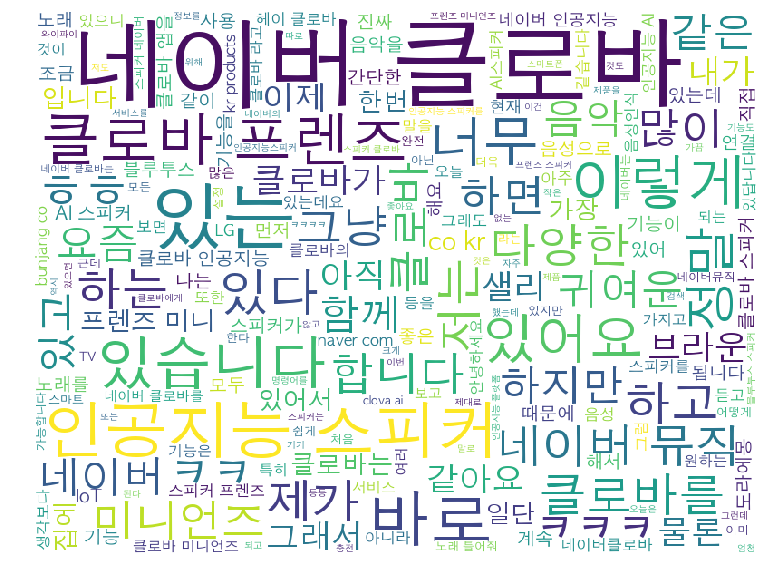

CPU times: user 3.2 s, sys: 417 ms, total: 3.62 s
Wall time: 3.66 s


In [38]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences))

In [46]:
s = """단독_보조금
청원
모식도
이
있
하
것
들
그
되
수
이
보
않
없
나
사람
주
아니
등
같
우리
때
년
가
한
지
대하
오
말
일
그렇
위하
때문
그것
두
말하
알
그러나
받
못하
일
그런
또
문제
더
사회
많
그리고
좋
크
따르
중
나오
가지
씨
시키
만들
지금
생각하
그러
속
하나
집
살
모르
적
월
데
자신
안
어떤
내
내
경우
명
생각
시간
그녀
다시
이런
앞
보이
번
나
다른
어떻
여자
개
전
들
사실
이렇
점
싶
말
정도
좀
원
잘
통하
소리
놓
동안
을
다음
연도
이상
위
아래
간
대
각종
후
반면
대부분
회
년대
조
포함
차
산하
바
이내
뿐
급
별지
량
초기
미만
관련
형
위주
외
한편
최대한
그동안
호
이후
과
당초
아래
실
앞으로
본래
이전
형
양
항
타
편
내외
카
마
개월
동
단
그중
예
자
곳
관련
르
다
척
분
선
칙
단
장
밖
유
이외
국
경
미
만
건
일부
업
직
그간
기
이하
이래
력
증
붙임
개월
기타
약간
향후
만큼
화
기존
가칭
보임
정
포괄
나머지
여명
실
올해
전년
생수
여타
최근
다수
추후
에
대한
통해
등에
개소
소
배
현
으
로
종
각각"""



In [50]:
stopwords_kr = s.split('\n')

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = font_path, 
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

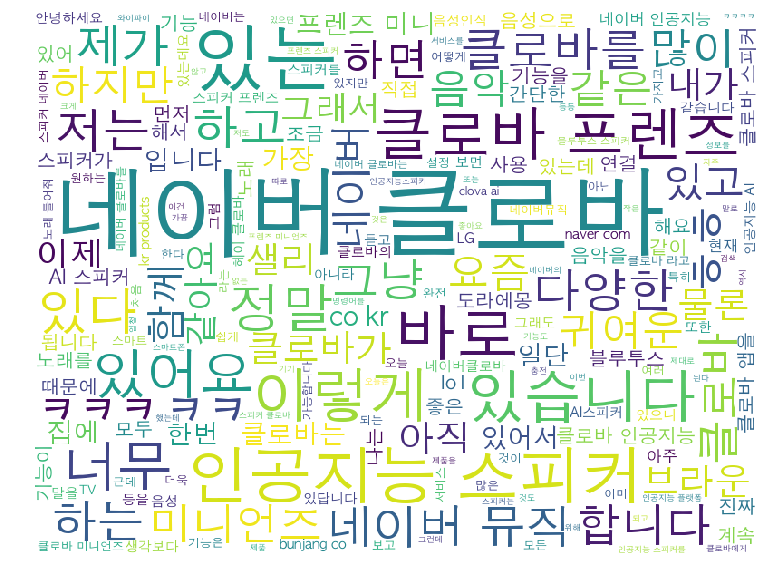

CPU times: user 2.98 s, sys: 353 ms, total: 3.33 s
Wall time: 3.34 s


In [52]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences))

In [53]:
from soynlp.noun import LRNounExtractor

In [85]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (15840, 9416) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 2765 nouns are extracted
CPU times: user 3.28 s, sys: 22.9 ms, total: 3.3 s
Wall time: 3.32 s


In [86]:
nouns['네이버']

NounScore_v1(frequency=4567, score=0.6611192370173103, known_r_ratio=0.53604568165596)

In [87]:
nouns['ai']

NounScore_v1(frequency=21, score=0.87443925, known_r_ratio=0.19047619047619047)

In [91]:
nouns['sk']

NounScore_v1(frequency=10, score=0.9616004, known_r_ratio=0.5)

In [90]:
nouns['Friend']

NounScore_v1(frequency=2, score=0.999605, known_r_ratio=0.06666666666666667)

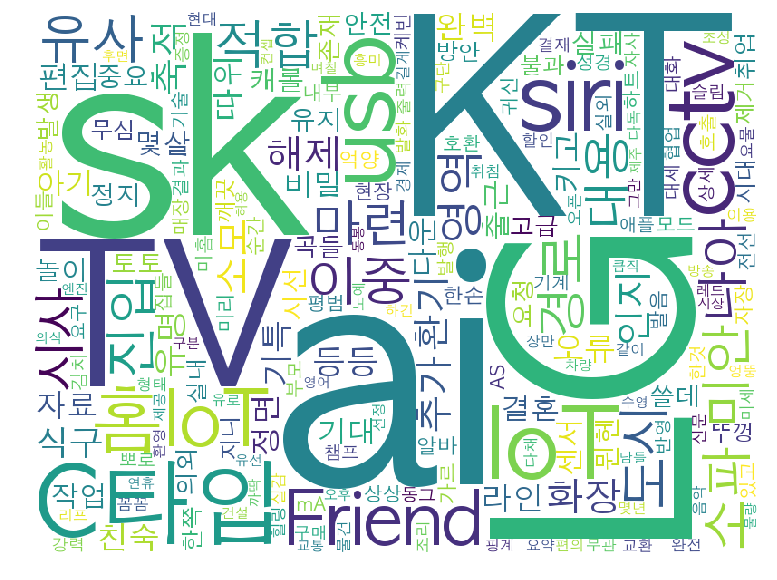

CPU times: user 1.38 s, sys: 322 ms, total: 1.7 s
Wall time: 1.72 s


In [88]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))

<br/><br/>
### 6. 벡터화 된 단어를 통해 단어 유사도 확인

In [68]:
model.wv['미니언즈']

array([ 0.981062  ,  0.7812089 ,  0.2204942 , -0.74791837,  0.17599322,
        0.7292673 , -0.9261379 , -0.14323364, -2.2413201 ,  2.351476  ,
       -1.590868  , -1.8266985 , -0.86820024,  1.9185988 , -0.9004272 ,
        1.1935173 ,  0.79394996,  0.3350256 ,  0.11210074,  3.2364547 ,
       -1.2331371 , -2.2659667 ,  1.3522481 ,  0.6444229 , -0.68286365,
       -1.543316  , -0.21956798, -1.2233258 , -0.7774971 , -1.3595021 ,
        3.1352837 ,  0.47932276, -1.857491  ,  0.9582073 ,  2.182111  ,
       -0.90871954, -0.3286724 ,  0.09991083,  0.85947114,  1.6464711 ,
        0.9952446 , -1.1397307 , -1.1897075 , -1.7814736 , -0.8765569 ,
        1.4675239 ,  1.11907   ,  0.15332171,  1.7304934 , -0.9158513 ,
       -0.11628515,  2.0043416 , -2.038563  , -0.5066461 , -1.0130363 ,
       -1.2255081 ,  1.7323534 , -1.2830237 , -0.7358765 , -2.2602148 ,
       -0.19541454,  0.5705668 , -1.6892406 ,  1.3111106 , -0.0369622 ,
        1.9627573 ,  0.7570953 , -0.06502582,  3.1116107 , -2.30

In [69]:
model.wv.most_similar('미니언즈')

2019-04-25 02:18:00,055 : INFO : precomputing L2-norms of word weight vectors


[('출시된', 0.9995918273925781),
 ('브라운', 0.999556839466095),
 ('라인', 0.999448835849762),
 ('스피커는', 0.9992828369140625),
 ('네이버의', 0.9992344379425049),
 ('앱은', 0.9990708827972412),
 ('웨이브', 0.9989928007125854),
 ('인공지능스피커', 0.9989773035049438),
 ('위해서는', 0.9989343881607056),
 ('개발한', 0.9988585710525513)]

In [70]:
model.wv.most_similar('브라운')

[('웨이브', 0.9995917081832886),
 ('미니언즈', 0.999556839466095),
 ('라인', 0.9994499683380127),
 ('프렌즈미니', 0.9994010925292969),
 ('출시된', 0.9992969036102295),
 ('Brown', 0.9990897178649902),
 ('사용법', 0.9990556240081787),
 ('스피커는', 0.9990552067756653),
 ('인공지능스피커', 0.998977780342102),
 ('네이버의', 0.9989392757415771)]

In [71]:
model.wv.most_similar('클로바')

[('뮤직과', 0.9986414909362793),
 ('뮤직', 0.9977520704269409),
 ('스피커는', 0.997516393661499),
 ('프렌즈로', 0.9969796538352966),
 ('인공지는', 0.9969773292541504),
 ('스피커에', 0.9969342947006226),
 ('미니언즈', 0.9969182014465332),
 ('사용해서', 0.9968682527542114),
 ('네이버의', 0.9968206882476807),
 ('위해서는', 0.9967833757400513)]

In [72]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('네이버 클로바 카카오 브라운 미니언즈'.split())

/Users/Taewoo/anaconda2/envs/python36/lib/python3.6/site-packages/gensim/models/keyedvectors.py:730: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'카카오'

In [73]:
model.wv.most_similar(positive=['네이버', '클로바'], negative=['카카오'])

[('프렌즈와', 0.9975800514221191),
 ('프렌즈', 0.9970936179161072),
 ('프렌즈는', 0.9967164993286133),
 ('갖춘', 0.9955490231513977),
 ('미니', 0.9952576756477356),
 ('프렌즈의', 0.995008111000061),
 ('관계자는', 0.9947230815887451),
 ('프렌즈를', 0.9946826696395874),
 ('에디션의', 0.9944397211074829),
 ('인공지능', 0.9938856363296509)]

In [74]:
model.wv.similarity('네이버', '애기')

0.9136039339537629

In [75]:
model.wv.similarity('네이버', '블루투스')

0.9667842464319509

In [76]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)

2019-04-25 02:18:04,013 : INFO : loading Doc2Vec object from 1minwords
2019-04-25 02:18:04,521 : INFO : loading wv recursively from 1minwords.wv.* with mmap=None
2019-04-25 02:18:04,522 : INFO : setting ignored attribute vectors_norm to None
2019-04-25 02:18:04,522 : INFO : loading vocabulary recursively from 1minwords.vocabulary.* with mmap=None
2019-04-25 02:18:04,523 : INFO : loading trainables recursively from 1minwords.trainables.* with mmap=None
2019-04-25 02:18:04,524 : INFO : setting ignored attribute cum_table to None
2019-04-25 02:18:04,525 : INFO : loaded 1minwords


In [77]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])

/Users/Taewoo/anaconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


Feature의 길이 64787
[-9.5297565e-04 -9.6663972e-03  4.6731518e-03 -8.7256660e-04
 -5.1932442e-03 -6.6807093e-03  2.0249200e-03 -2.1494846e-03
 -3.1103033e-03  3.2959477e-05]


In [78]:
df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [79]:
df.head(20)

,x,y
애기들이,6.792372,-12.575448
좋아하는,-4.296516,6.521200
ai,-5.064204,5.395072
스피커,-5.590484,11.723165
네이버클로바,-5.850329,6.843498
작년부터,3.222146,-5.471593
tv,-2.894447,3.948146
에,-5.062975,6.709051
인공지능,-5.600950,11.703813
스피커가,-6.381089,8.343129


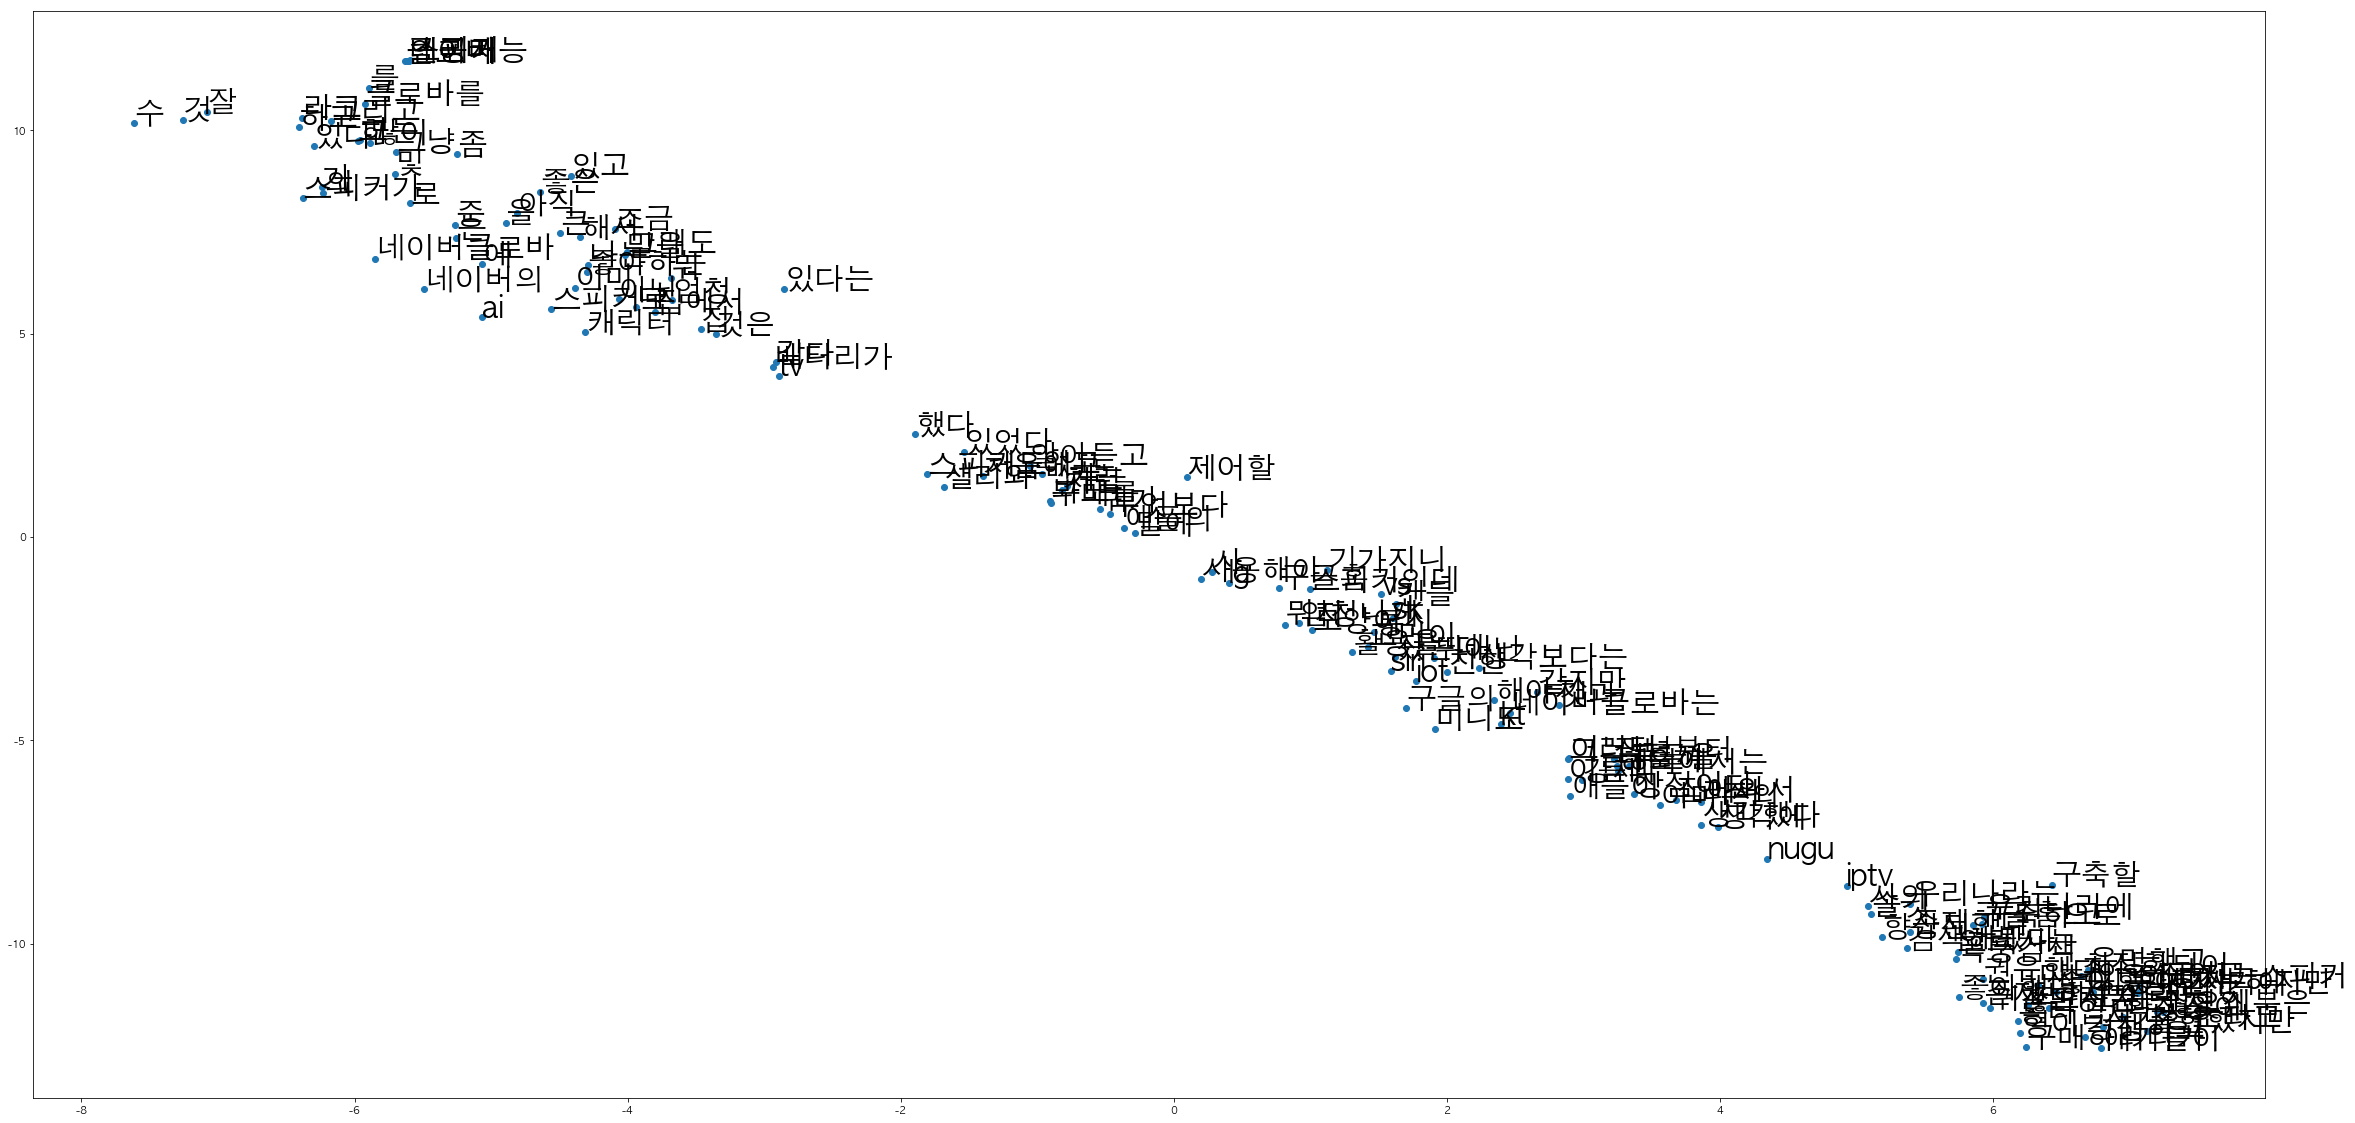

In [80]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [60]:
from sklearn.feature_extraction.text import CountVectorizer     # 벡터 수 카운트 할 때
from sklearn.feature_extraction.text import TfidfTransformer    #Tf * idf 구할 때

In [93]:
sentences = notnull_df['text'].apply(preprocessing)
sentences

0       애기들이 좋아하는 ai스피커 네이버클로바 작년부터 tv에  인공지능 스피커가  엄청...
1       네이버 클로바 스피커  년 사용 후기 네이버 클로바  년 사용 후기를 몇 자 적어볼...
2       어제는 눈이 갑자기 많이 내려서  주일에 한번 가는 문센을 가야하나 말아야하나고민이...
3       안녕하세요  제르디난 입니다  올해 초 카카오 미니를 사용해보고 약간의 실망스러움과...
4       네이버 클로바 스피커 브라운 미니언   오히려 부모님 선물로 추천드려요  요새 정말...
5       네이버 클로바 미니언즈로 메이네 집이 스마트해졌습니다  ㅋㅋ 저희가 쓰는 인터넷이 ...
6       네이버 클로바 스피커 사용해보기 저는 유행에 둔감한 사람인 것 같습니다  아마도 나...
7       최근 구글 어시스턴트  아마존 알렉사  애플 시리  삼성전자 빅스비 등 인공지능 기...
8       꼬물 꼬물 귀요미 미니언즈가LG유플러스 네이버 클로바 스페셜에디션으로나왔어요  보기...
9       인공지능스피커 네이버 클로바맘스다이어리 천일스토리로 육아정보 들어요 육아하는 엄마들...
10      내 사랑 도라에몽이네이버 클로바 스피커로 나와서잽싸게 득템했어요 으흐흐개봉기 및 후...
11      이미 출시 된지는 조금 지나긴 했지만 이제야 만나보는 네이버클로바 미니언즈 블루투스...
12      네이버 클로바프렌즈 미니 개봉기 바야흐로 인공지능의 시대다  몇년전 떠들석했던 이세...
13      안녕하세용ㅋㅋㅋ잇님들 자취방에서 이제 티비를 신청해서얻게된 네이버 클로바 입니다  ...
14        월이라고 날씨가 너무 추운데요아들 데리고 나가서 이것저것 보여주고 싶은데 또 그...
16      미니언즈 네이버 클로바 스피커 밥 BOB  개봉기  네이버 클로바 스피커 미니언즈 ...
17      조만간 조만간 하다가 어느새 한달이 넘었습니다 한달을 쓴만큼 자세히 클로바 사용후기...
18      제가 최근에

In [94]:
cv=CountVectorizer(max_df=0.85, max_features=10000)     # , maximum 단어의 개수를 1만개로 정함 - 빈도수가 높은 단어 순으로 1만개를 자름(메모리 에러 안나려고)
word_count_vector=cv.fit_transform(sentences)      # vectorize된 word_count_vector

In [95]:
#generate tf-idf for the given document set
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)        # Tf-idf 가중치를 적용할 수 있도록 변환시켜줌
tf_idf_matrix = tfidf_transformer.fit_transform(word_count_vector)
# you only needs to do this once, this is a mapping of index to
feature_names=cv.get_feature_names()            # feature가 몇개냐 ? 구해줌

dense = tf_idf_matrix.todense()

In [96]:
for i in range(len(dense)):
    doc = dense[i].tolist()[0]           # 여러개의 문헌을 하고 싶으면 'dense[0].tolist()[0]'가 아니라 다르게 해줘야 함 (for문)
    phrase_scores = [pair for pair in zip(range(0, len(doc)), doc) if pair[1] > 0]      # 0의 값이 아닌것만 모아서 만듦
    #print(len(phrase_scores))

    if len(phrase_scores) < 5:
        continue
    #sorted_words = sorted(phrase_scores, key=lambda t: t[1] * -1)[:5]                   # -1 곱해준건 오름차순 -> 내림차순으로 변환하기 위함
    #print(sorted_words)

    sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
    #for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:5]:
    for rank, (phrase, score) in enumerate([(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:5]):
        #print('{0: <20} {1}'.format(phrase, score))      # 단어와 단어의 tf-idf 값을 출력
        print('{0: <5} {1: <5} {2: <20}, {3}'.format(i, rank, phrase, score))
    print()

0     0     애들이                 , 0.20142610110992107
0     1     부르는                 , 0.19139981344378446
0     2     통신                  , 0.1794388884519208
0     3     와이파이를               , 0.172036011404355
0     4     처음에는                , 0.14156666167569454

1     0     쥬니버에서               , 0.26376913122643525
1     1     주고                  , 0.2165537411495799
1     2     동요                  , 0.20769793550288243
1     3     있습니다                , 0.16120456890226773
1     4     점수를                 , 0.1608750411503141

2     0     육아정보를               , 0.2563381010542333
2     1     사용법은                , 0.1824362244536861
2     2     가능해요                , 0.1663012724591987
2     3     맘스다이어리에서            , 0.164625458877469
2     4     사용이                 , 0.1638313315469006

3     0     인식하는                , 0.197324747804537
3     1     카카오                 , 0.17903452944286763
3     2     눌러주면                , 0.1667844089346968
3     3     미에어                 , 0.157

80    2     매우                  , 0.2251843365838843
80    3     무한                  , 0.21372734912211114
80    4     특히                  , 0.15638621502482059

81    0     뒤집고                 , 0.4836549497107449
81    1     콩콩이                 , 0.2817766442299088
81    2     에디션                 , 0.19803877770557354
81    3     언능                  , 0.14583926945420514
81    4     안방에서                , 0.1408883221149544

82    0     hue                 , 0.4774280615864305
82    1     필립스                 , 0.3777053704205222
82    2     통해                  , 0.2501651070840064
82    3     조명                  , 0.16485750057247908
82    4     조명을                 , 0.15914268719547683

83    0     미니                  , 0.42974679246187264
83    1     편리합니다               , 0.22115565154904218
83    2     네이버                 , 0.21901793811186254
83    3     인공지능                , 0.16825338865650544
83    4     나름                  , 0.1596534626979494

84    0     일상이                 


198   0     강추                  , 0.18473487214812953
198   1     싶다고                 , 0.1801177073089857
198   2     같이                  , 0.17624634436246456
198   3     후기                  , 0.1744059038995111
198   4     되더라구요               , 0.14867313758005332

199   0     bunjang             , 0.3121343818806138
199   1     번개장터로               , 0.3121343818806138
199   2     products            , 0.3097402791020863
199   3     확인이                 , 0.29869960848055244
199   4     co                  , 0.28534149372874185

200   0     오늘의                 , 0.32312051801167674
200   1     잘듣는                 , 0.28617086779682405
200   2     세상입니다               , 0.2764559473793527
200   3     대한민국                , 0.2618070768105552
200   4     세계                  , 0.23485618977150877

201   0     bunjang             , 0.33795168474211307
201   1     번개장터로               , 0.33795168474211307
201   2     products            , 0.33535956059810057
201   3     확인이                


369   0     나도                  , 0.4095723986630918
369   1     메시지를                , 0.25167195499525613
369   2     마지막                 , 0.24411233913820515
369   3     clovaspeaker        , 0.23763666744825732
369   4     promotion           , 0.23763666744825732

370   0     스케줄                 , 0.19738894585436373
370   1     표정으로                , 0.18255282050900415
370   2     블루투스                , 0.17929054383645177
370   3     물으면                 , 0.1723721814767058
370   4     해도                  , 0.17144470390599914

371   0     ㅎㅎ                  , 0.3590980868760254
371   1     ㅜㅜ                  , 0.2460707209406576
371   2     이용권까지               , 0.17535637903072118
371   3     할인가로                , 0.16800344820121144
371   4     music               , 0.16439367396504068

372   0     누구                  , 0.584610707811974
372   1     sk텔레콤               , 0.24146524568490052
372   2     무드등                 , 0.20326127377020126
372   3     경우                

616   4     대화는                 , 0.1430654328430531

617   0     귀여우니까               , 0.2944409827957188
617   1     그냥                  , 0.22549796990840387
617   2     같다                  , 0.1895358138941321
617   3     년치                  , 0.18275811340751102
617   4     음질은                 , 0.1569462702570562

618   0     ㅎㅎ                  , 0.20625122887598324
618   1     하면서                 , 0.19945235452594318
618   2     즐겁게                 , 0.18224155151075971
618   3     좋아                  , 0.1700241028663035
618   4     순간                  , 0.15974439999248102

619   0     생활                  , 0.20756007691378175
619   1     앱은                  , 0.19484039634441722
619   2     보입니다                , 0.1913580439908803
619   3     서비스                 , 0.1791421775361583
619   4     필요한                 , 0.17302337242632834

620   0     음성                  , 0.47910734149272977
620   1     네이버i                , 0.3330971064234382
620   2     인식                  

810   1     빨리                  , 0.24967307379939074
810   2     결합해서                , 0.2167162538323
810   3     출시와                 , 0.2076290473510336
810   4     지금                  , 0.2009149580908583

811   0     이야기                 , 0.3664128638402086
811   1     옛날                  , 0.33633567622264565
811   2     클로바가                , 0.2148512060863454
811   3     뒤로는                 , 0.18799197346357896
811   4     들려준답니다              , 0.18799197346357896

812   0     되었던                 , 0.347673948618264
812   1     가야                  , 0.3358711233759248
812   2     식구                  , 0.3358711233759248
812   3     포장은                 , 0.3262275129732198
812   4     주문했던                , 0.3180739565550601

813   0     아이폰x                , 0.2931357336989035
813   1     노트                  , 0.2118503434327719
813   2     ai                  , 0.17780018235479114
813   3     무료로                 , 0.16169732404952292
813   4     고객                  , 0.16097